# Phase 3 — Clustering

In this phase, we perform unsupervised clustering using the **K-Means algorithm**.  
The procedure is as follows:

1. Load the preprocessed dataset (`X_train.csv`) from Phase 2.  
2. Select the 7 lifestyle habit features:  
   - Sleep_Hours  
   - Work_Hours  
   - Physical_Activity_Hours  
   - Social_Media_Usage  
   - Diet_Quality  
   - Smoking_Habit  
   - Alcohol_Consumption  
3. Compute **Silhouette Scores** for different cluster sizes (k = 2 to 10).  
   - The silhouette score measures how well-separated the clusters are (range: -1 to 1).  
   - Higher scores indicate better-defined clusters.  
4. Identify the **optimal number of clusters** based on the highest silhouette score.  
5. Apply **final K-Means clustering** with the chosen k.  
6. Assign cluster labels to each individual and save the dataset (`X_train_with_clusters.csv`).  


In [18]:
# === Import Required Libraries ===
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for clear academic plots
sns.set(style="whitegrid")

# === Load Dataset ===
PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
DATA_PATH = PROJECT_ROOT / "outputs" / "X_train.csv"

X = pd.read_csv(DATA_PATH)

# === Select Lifestyle Habit Features ===
features = [
    "Sleep_Hours", 
    "Work_Hours", 
    "Physical_Activity_Hours",
    "Social_Media_Usage", 
    "Diet_Quality", 
    "Smoking_Habit", 
    "Alcohol_Consumption"
]

X_lifestyle = X[features]

print("Selected features for clustering:", features)
X_lifestyle.head(3)


Selected features for clustering: ['Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption']


,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption
0,0.383333,0.56,0.9,0.127273,0,1,1
1,0.316667,0.64,0.8,0.818182,0,3,3
2,0.883333,0.04,0.6,0.490909,2,2,2


**Silhouette Scoring**

Shape of selected training features: (35000, 7)
k = 2, silhouette score = 0.2630
k = 2, silhouette score = 0.2630
k = 3, silhouette score = 0.2545
k = 3, silhouette score = 0.2545
k = 4, silhouette score = 0.2864
k = 4, silhouette score = 0.2864
k = 5, silhouette score = 0.2626
k = 5, silhouette score = 0.2626
k = 6, silhouette score = 0.2443
k = 6, silhouette score = 0.2443
k = 7, silhouette score = 0.2500
k = 7, silhouette score = 0.2500
k = 8, silhouette score = 0.2248
k = 8, silhouette score = 0.2248
k = 9, silhouette score = 0.2306
k = 9, silhouette score = 0.2306
k = 10, silhouette score = 0.2185

Optimal number of clusters on X_train (7 features): k = 4, silhouette score = 0.2864
k = 10, silhouette score = 0.2185

Optimal number of clusters on X_train (7 features): k = 4, silhouette score = 0.2864


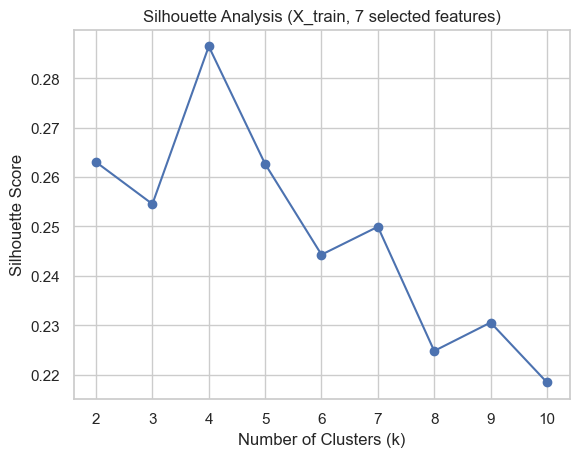

In [21]:
# Step — Silhouette Scoring on X_train (7 selected features only)

import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load training set
PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
OUTPUTS = PROJECT_ROOT / "outputs"

X_train = pd.read_csv(OUTPUTS / "X_train.csv")

# Keep only the 7 selected features
selected_features = [
    "Sleep_Hours",
    "Work_Hours",
    "Physical_Activity_Hours",
    "Social_Media_Usage",
    "Diet_Quality",
    "Smoking_Habit",
    "Alcohol_Consumption"
]

X_train_sel = X_train[selected_features]

print("Shape of selected training features:", X_train_sel.shape)

# Run silhouette scoring
silhouette_scores = {}

for k in range(2, 11):  # test k = 2..10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train_sel)
    score = silhouette_score(X_train_sel, labels)
    silhouette_scores[k] = score
    print(f"k = {k}, silhouette score = {score:.4f}")

# Identify best k
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nOptimal number of clusters on X_train (7 features): k = {best_k}, "
      f"silhouette score = {silhouette_scores[best_k]:.4f}")

# Plot silhouette scores
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis (X_train, 7 selected features)")
plt.show()


**K-means Clustering**

In [31]:
from sklearn.cluster import KMeans

# Use the best_k from silhouette scoring
best_k = 4   # <-- replace with the actual best_k you found
X_train_sel = X_train[selected_features]

# Fit KMeans on the selected features
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
train_labels = kmeans.fit_predict(X_train_sel)

# Add cluster labels back to the dataframe
X_train_clustered = X_train_sel.copy()
X_train_clustered["Cluster"] = train_labels

print("Cluster counts:")
print(X_train_clustered["Cluster"].value_counts())
X_train_clustered.head()


Cluster counts:
Cluster
2    8859
0    8827
3    8721
1    8593
Name: count, dtype: int64


,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Cluster
0,0.38,0.56,0.90,0.13,0,1,1,2
1,0.32,0.64,0.80,0.82,0,3,3,3
2,0.88,0.04,0.60,0.49,2,2,2,3
3,0.43,0.66,1.00,0.25,1,0,2,0
4,0.82,0.06,0.90,0.16,0,3,3,3


In [ ]:
pd.set_option("display.float_format", "{:.2f}".format)  # 2 decimals
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-detect width
pd.set_option('display.max_colwidth', None)  # No column width limit

cluster_profiles = (
    X_train_clustered.groupby("Cluster")[selected_features]
    .mean()
    .round(2)  # round to 2 decimals
)

print("\nCluster Profiles (mean values of each feature):")
print(cluster_profiles.to_string())  # Use to_string() for better formatting



Cluster Profiles (mean values of each feature):
         Sleep_Hours  Work_Hours  Physical_Activity_Hours  Social_Media_Usage  Diet_Quality  Smoking_Habit  Alcohol_Consumption
Cluster                                                                                                                        
0               0.50        0.50                     0.50                0.50          0.99           0.50                 2.50
1               0.49        0.50                     0.50                0.51          0.98           2.50                 0.51
2               0.50        0.50                     0.50                0.50          1.01           0.50                 0.50
3               0.51        0.50                     0.50                0.50          1.01           2.50                 2.50


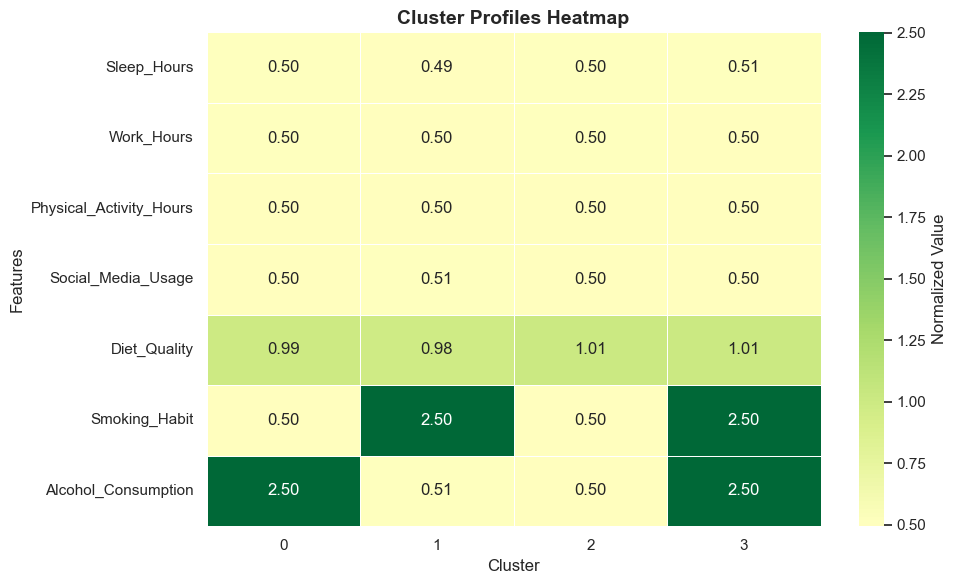

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles.T, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0.5, linewidths=0.5, cbar_kws={'label': 'Normalized Value'})
plt.title('Cluster Profiles Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

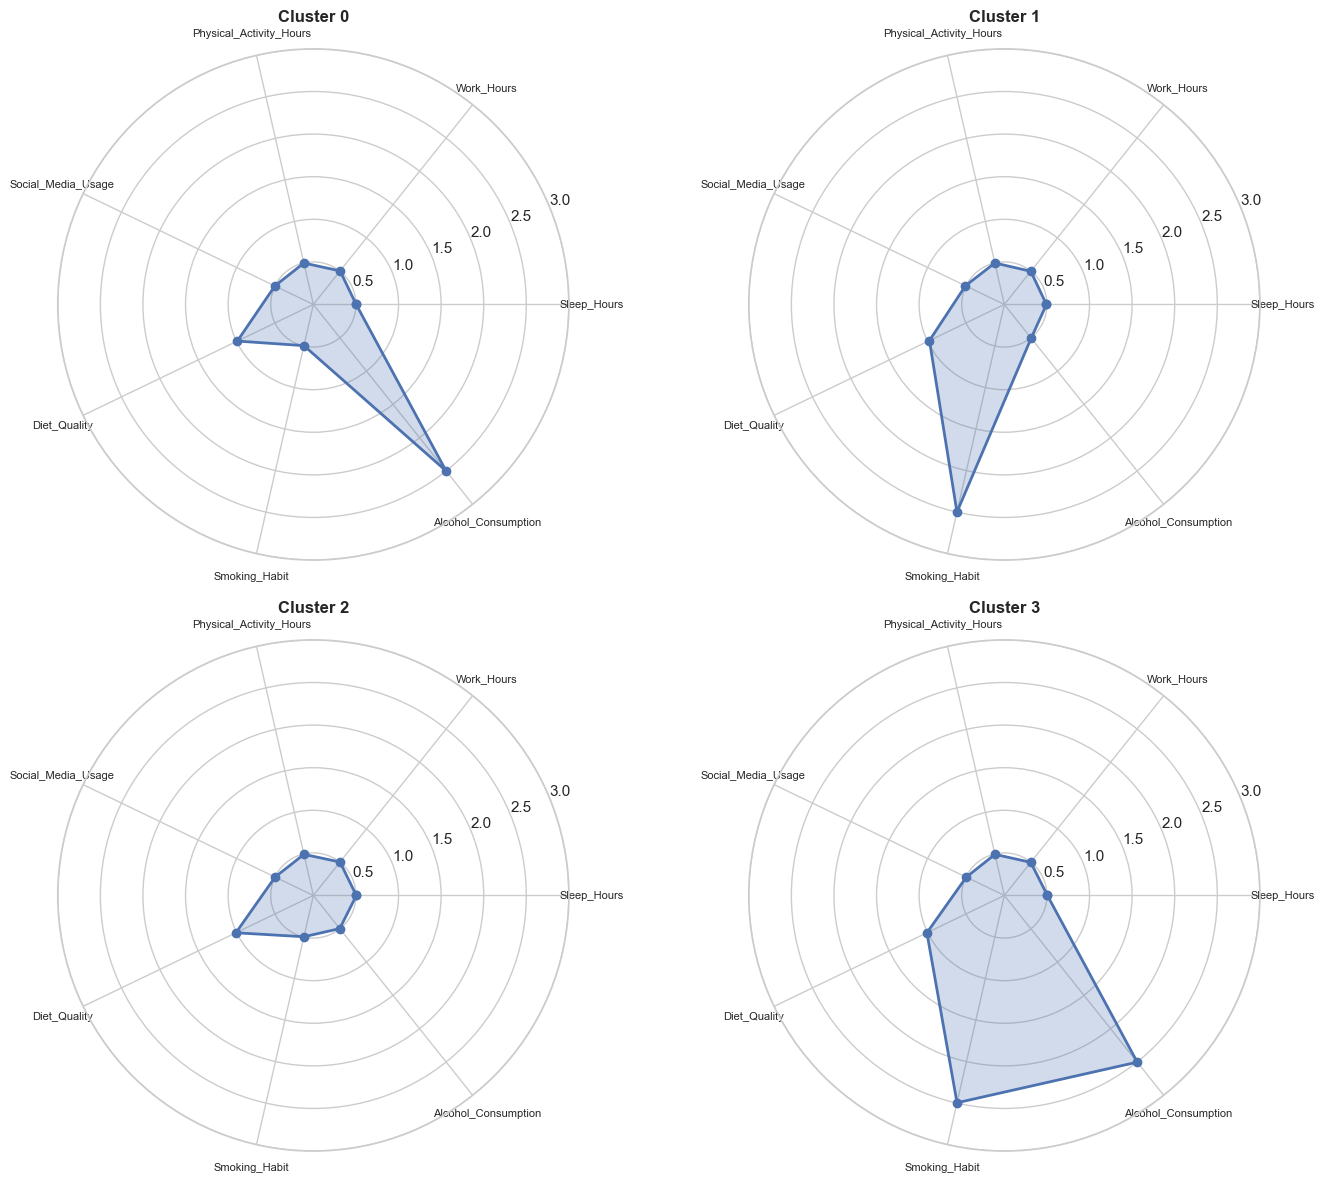

In [35]:
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 12), subplot_kw=dict(projection='polar'))
axes = axes.flatten()

features = cluster_profiles.columns
num_vars = len(features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

for idx, cluster in enumerate(cluster_profiles.index):
    values = cluster_profiles.loc[cluster].tolist()
    values += values[:1]  # Complete the circle
    
    ax = axes[idx]
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, size=8)
    ax.set_ylim(0, 3)
    ax.set_title(f'Cluster {cluster}', size=12, fontweight='bold', pad=20)
    ax.grid(True)

plt.tight_layout()
plt.show()